In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime
from Datasets import process 

In [62]:
from scipy.stats import kendalltau
from scipy.special import comb
import math

def krcc_test(x, y):
    if len(x) == len(y):
        n = len(x)

        # default scipy is tau_b
        krcc = kendalltau(x, y)
        
        # https://github.com/mmhs013/pyMannKendall this also finds the tau and mann-kendall score but it doesnt do what we want
        
        print("KRCC =", krcc[0])

        # The two-sided p-value for a hypothesis test whose null hypothesis is an absence of association, tau = 0
        print("p value =", krcc[1])

    else:
        print("inconsistent number of points in x and y")

In [76]:
# Health Organizations
healthorg_df = pd.read_csv('./Processed Datasets/healthorg.csv')
healthorg_df = process.filter_dates(healthorg_df)

In [77]:
# News Outlets
leftnews_df = pd.read_csv('./Processed Datasets/leftnews.csv')
leftnews_df = process.filter_dates(leftnews_df)

rightnews_df = pd.read_csv('./Processed Datasets/rightnews.csv')
rightnews_df = process.filter_dates(rightnews_df)

In [78]:
# Individuals
leftind_df = pd.read_csv('./Processed Datasets/leftind.csv')
leftind_df = process.filter_dates(leftind_df)

rightind_df = pd.read_csv('./Processed Datasets/rightind.csv')
rightind_df = process.filter_dates(rightind_df)

celeb_df = pd.read_csv('./Processed Datasets/celebrities.csv')
celeb_df = process.filter_dates(celeb_df)

In [79]:
# fake / real
# still need to add covid_lies to fake data
fake_df = pd.read_csv('./Processed Datasets/fake.csv')
fake_df = process.filter_dates(fake_df)
real_df = pd.read_csv('./Processed Datasets/real.csv')
real_df = process.filter_dates(real_df)


In [80]:
%%capture
# make weighted retweets and likes columns for all datasets

# health organizations
file = pd.read_csv("./Datasets/healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()
# keep likes and retweets separate, divide by followers
healthorg_df['retweets_weight'] = healthorg_df['retweets_count']/healthorg_followers
healthorg_df['likes_weight'] = healthorg_df['likes_count']/healthorg_followers

# left
file = pd.read_csv("./Datasets/leftind_followers", usecols=[0, 1])
leftind_followers = file["followers"].sum()
leftind_df['retweets_weight'] = leftind_df['retweets_count']/leftind_followers
leftind_df['likes_weight'] = leftind_df['likes_count']/leftind_followers

# right
file = pd.read_csv("./Datasets/rightind_followers", usecols=[0, 1])
rightind_followers = file["followers"].sum()
rightind_df['retweets_weight'] = rightind_df['retweets_count']/rightind_followers
rightind_df['likes_weight'] = rightind_df['likes_count']/rightind_followers

# celeb
file = pd.read_csv("./Datasets/celebrity_followers", usecols=[0, 1])
celeb_followers = file["followers"].sum()
celeb_df['retweets_weight'] = celeb_df['retweets_count']/celeb_followers
celeb_df['likes_weight'] = celeb_df['likes_count']/celeb_followers

# right news outlets
file = pd.read_csv("./Datasets/rightnews_followers", usecols=[0, 1])
rightnews_followers = file["followers"].sum()
rightnews_df['retweets_weight'] = rightnews_df['retweets_count']/rightnews_followers
rightnews_df['likes_weight'] = rightnews_df['likes_count']/rightnews_followers

# left news outlets
file = pd.read_csv("./Datasets/leftnews_followers", usecols=[0, 1])
leftnews_followers = file["followers"].sum()
leftnews_df['retweets_weight'] = leftnews_df['retweets_count']/leftnews_followers
leftnews_df['likes_weight'] = leftnews_df['likes_count']/leftnews_followers

# real
real_followers = real_df["user_followers_count"].drop_duplicates().sum()
real_df['retweets_weight'] = real_df['retweet_count']/real_followers
real_df['likes_weight'] = real_df['favorite_count']/real_followers

# fake
fake_followers = fake_df["user_followers_count"].drop_duplicates().sum()
fake_df['retweets_weight'] = fake_df['retweet_count']/fake_followers
fake_df['likes_weight'] = fake_df['favorite_count']/fake_followers

In [81]:
# make timelines for each group

# health
health_engage = healthorg_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
health_likes = health_engage.groupby('date')["likes_count"].sum()
health_retweets = health_engage.groupby('date')["retweets_count"].sum()

# right
rightind_engage = rightind_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
rightind_likes = rightind_engage.groupby('date')["likes_count"].sum()
rightind_retweets = rightind_engage.groupby('date')["retweets_count"].sum()

# left
leftind_engage = leftind_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
leftind_likes = leftind_engage.groupby('date')["likes_count"].sum()
leftind_retweets = leftind_engage.groupby('date')["retweets_count"].sum()

# celeb
celeb_engage = celeb_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
celeb_likes = celeb_engage.groupby('date')["likes_count"].sum()
celeb_retweets = celeb_engage.groupby('date')["retweets_count"].sum()

# left news
leftnews_engage = leftnews_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
leftnews_likes = leftnews_engage.groupby('date')["likes_count"].sum()
leftnews_retweets = leftnews_engage.groupby('date')["retweets_count"].sum()

# right news
rightnews_engage = rightnews_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
rightnews_likes = rightnews_engage.groupby('date')["likes_count"].sum()
rightnews_retweets = rightnews_engage.groupby('date')["retweets_count"].sum()

# real
real_engage = real_df[['date', 'favorite_count', 'retweet_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
real_likes = real_engage.groupby('date')["favorite_count"].sum()
real_retweets = real_engage.groupby('date')["retweet_count"].sum()

# fake
fake_engage = fake_df[['date', 'favorite_count', 'retweet_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
fake_likes = fake_engage.groupby('date')["favorite_count"].sum()
fake_retweets = fake_engage.groupby('date')["retweet_count"].sum()



In [82]:
healthorg_df["date"] = pd.to_datetime(healthorg_df["date"])
rightind_df["date"] = pd.to_datetime(rightind_df["date"])
leftind_df["date"] = pd.to_datetime(leftind_df["date"])
rightnews_df["date"] = pd.to_datetime(rightnews_df["date"])
leftnews_df["date"] = pd.to_datetime(leftnews_df["date"])
celeb_df["date"] = pd.to_datetime(celeb_df["date"])
real_df["date"] = pd.to_datetime(real_df["date"])
fake_df["date"] = pd.to_datetime(fake_df["date"])

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
rightind_dates = rightind_df.sort_values("date", ascending=True)["date"].value_counts()
leftind_dates = leftind_df.sort_values("date", ascending=True)["date"].value_counts()
celeb_dates = celeb_df.sort_values("date", ascending=True)["date"].value_counts()
rightnews_dates = rightnews_df.sort_values("date", ascending=True)["date"].value_counts()
leftnews_dates = leftnews_df.sort_values("date", ascending=True)["date"].value_counts()
fake_dates = fake_df.sort_values("date", ascending=True)["date"].value_counts()
real_dates = real_df.sort_values("date", ascending=True)["date"].value_counts()

In [83]:
bins = '3D'
health_rt_bin = (health_retweets/healthorg_dates).resample(bins).sum()
rightind_rt_bin = (rightind_retweets/rightind_dates).resample(bins).sum()
leftind_rt_bin = (leftind_retweets/leftind_dates).resample(bins).sum()
rightnews_rt_bin = (rightnews_retweets/rightnews_dates).resample(bins).sum()
leftnews_rt_bin = (leftnews_retweets/leftnews_dates).resample(bins).sum()
celeb_rt_bin = (celeb_retweets/celeb_dates).resample(bins).sum()
real_rt_bin = (real_retweets/real_dates).resample(bins).sum()
fake_rt_bin = (fake_retweets/fake_dates).resample(bins).sum()

Text(0.5, 1.0, 'Average Fake Retweets')

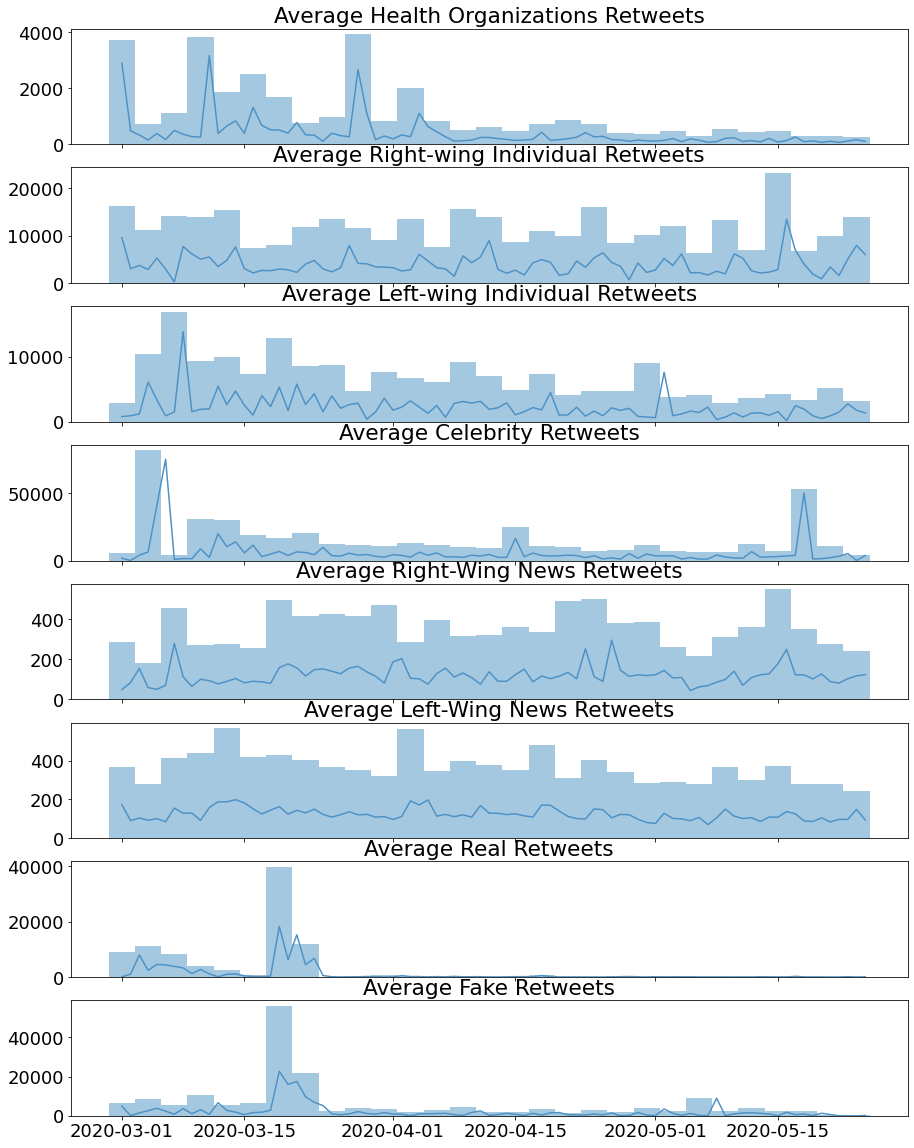

In [88]:
# plot avergae retweets
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)
axes[0].plot(health_retweets/healthorg_dates, color = '#4E92C5')
axes[0].bar((health_rt_bin).index.sort_values(), health_rt_bin, width=3, color = '#A5C8E1')
axes[0].set_title("Average Health Organizations Retweets")

axes[1].plot(rightind_retweets/rightind_dates, color = '#4E92C5')
axes[1].bar(rightind_rt_bin.index.sort_values(), rightind_rt_bin, width=3, color = '#A5C8E1')
axes[1].set_title("Average Right-wing Individual Retweets")

axes[2].plot(leftind_retweets/leftind_dates, color = '#4E92C5')
axes[2].bar(leftind_rt_bin.index.sort_values(), leftind_rt_bin, width=3, color = '#A5C8E1')
axes[2].set_title("Average Left-wing Individual Retweets")

axes[3].plot(celeb_retweets/celeb_dates, color = '#4E92C5')
axes[3].bar(celeb_rt_bin.index.sort_values(), celeb_rt_bin, width=3, color = '#A5C8E1')
axes[3].set_title("Average Celebrity Retweets")

axes[4].plot(rightnews_retweets/rightnews_dates, color = '#4E92C5')
axes[4].bar(rightnews_rt_bin.index.sort_values(), rightnews_rt_bin, width=3, color = '#A5C8E1')
axes[4].set_title("Average Right-Wing News Retweets")

axes[5].plot(leftnews_retweets/leftnews_dates, color = '#4E92C5')
axes[5].bar(leftnews_rt_bin.index.sort_values(), leftnews_rt_bin, width=3, color = '#A5C8E1')
axes[5].set_title("Average Left-Wing News Retweets")

axes[6].plot(real_retweets/real_dates, color = '#4E92C5')
axes[6].bar(real_rt_bin.index.sort_values(), real_rt_bin, width=3, color = '#A5C8E1')
axes[6].set_title("Average Real Retweets")

axes[7].plot(fake_retweets/fake_dates, color = '#4E92C5')
axes[7].bar(fake_rt_bin.index.sort_values(), fake_rt_bin, width=3, color = '#A5C8E1')
axes[7].set_title("Average Fake Retweets")

In [89]:
# bin likes
health_like_bin = (health_likes/healthorg_dates).resample('3D').sum()
rightind_like_bin = (rightind_likes/rightind_dates).resample('3D').sum()
leftind_like_bin = (leftind_likes/leftind_dates).resample('3D').sum()
rightnews_like_bin = (rightnews_likes/rightnews_dates).resample('3D').sum()
leftnews_like_bin = (leftnews_likes/leftnews_dates).resample('3D').sum()
celeb_like_bin = (celeb_likes/celeb_dates).resample('3D').sum()
real_like_bin = (real_likes/real_dates).resample('3D').sum()
fake_like_bin = (fake_likes/fake_dates).resample('3D').sum()

Text(0.5, 1.0, 'Average Fake Likes')

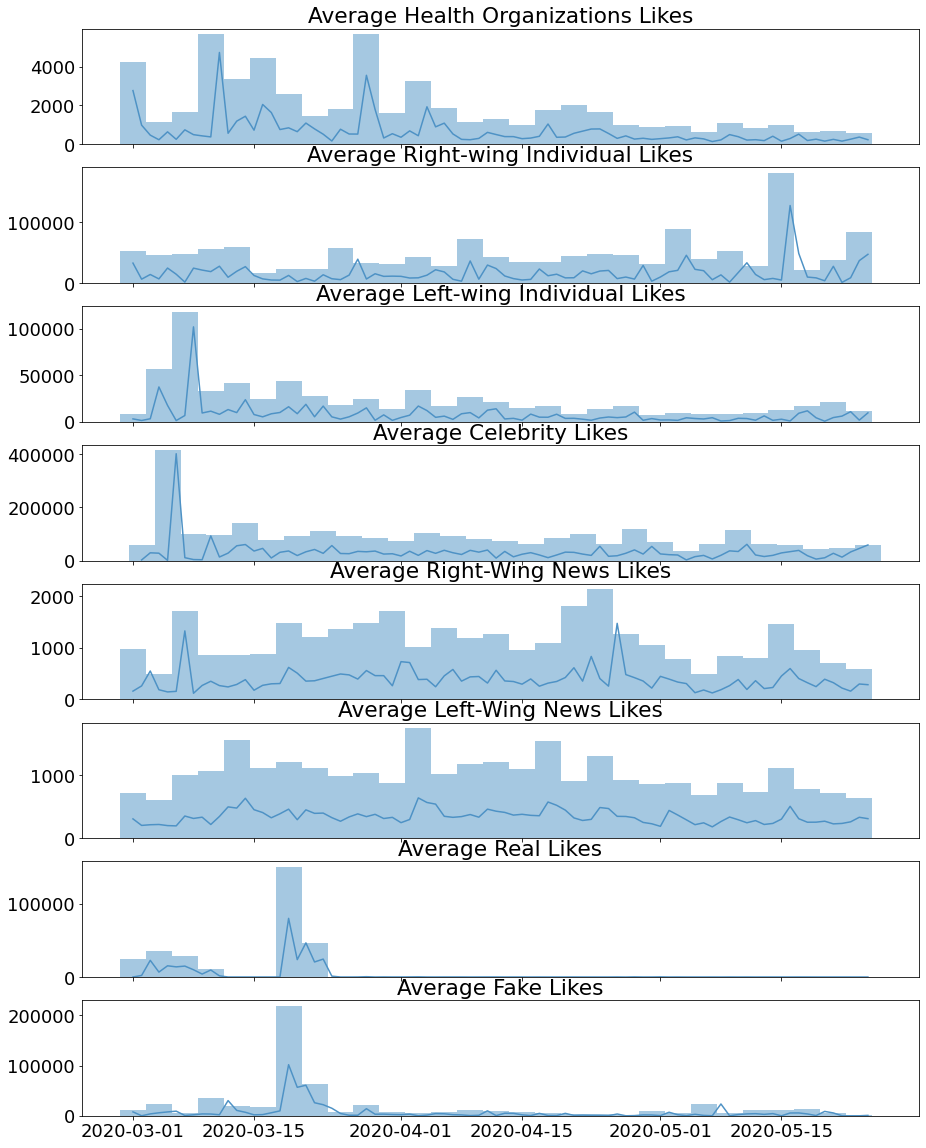

In [51]:
# plot likes divided by number of tweets
# plot
fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)
axes[0].plot(health_likes/healthorg_dates, color = '#4E92C5')
axes[0].bar((health_like_bin).index.sort_values(), health_like_bin, width=3, color = '#A5C8E1')
axes[0].set_title("Average Health Organizations Likes")

axes[1].plot(rightind_likes/rightind_dates, color = '#4E92C5')
axes[1].bar(rightind_like_bin.index.sort_values(), rightind_like_bin, width=3, color = '#A5C8E1')
axes[1].set_title("Average Right-wing Individual Likes")

axes[2].plot(leftind_likes/leftind_dates, color = '#4E92C5')
axes[2].bar(leftind_like_bin.index.sort_values(), leftind_like_bin, width=3, color = '#A5C8E1')
axes[2].set_title("Average Left-wing Individual Likes")

axes[3].plot(celeb_likes/celeb_dates, color = '#4E92C5')
axes[3].bar(celeb_like_bin.index.sort_values(), celeb_like_bin, width=3, color = '#A5C8E1')
axes[3].set_title("Average Celebrity Likes")

axes[4].plot(rightnews_likes/rightnews_dates, color = '#4E92C5')
axes[4].bar(rightnews_like_bin.index.sort_values(), rightnews_like_bin, width=3, color = '#A5C8E1')
axes[4].set_title("Average Right-Wing News Likes")

axes[5].plot(leftnews_likes/leftnews_dates, color = '#4E92C5')
axes[5].bar(leftnews_like_bin.index.sort_values(), leftnews_like_bin, width=3, color = '#A5C8E1')
axes[5].set_title("Average Left-Wing News Likes")

axes[6].plot(real_likes/real_dates, color = '#4E92C5')
axes[6].bar(real_like_bin.index.sort_values(), real_like_bin, width=3, color = '#A5C8E1')
axes[6].set_title("Average Real Likes")

axes[7].plot(fake_likes/fake_dates, color = '#4E92C5')
axes[7].bar(fake_like_bin.index.sort_values(), fake_like_bin, width=3, color = '#A5C8E1')
axes[7].set_title("Average Fake Likes")

In [52]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nLeft News Outlet Tweets: \t{}\nRight News Outlet Tweets:\t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_rt_bin), len(leftind_rt_bin), len(rightind_rt_bin), len(celeb_rt_bin), len(leftnews_rt_bin), len(rightnews_rt_bin), len(fake_rt_bin), len(real_rt_bin)))

HealthOrg Tweets: 	29
Left Tweets: 	29
Right Tweets: 	29
Celeb Tweets: 	29
Left News Outlet Tweets: 	29
Right News Outlet Tweets:	29
Fake Tweets:		29
Real Tweets:		29



In [53]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nRight News Outlet Tweets: \t{}\nLeft News Outlet Tweets:\t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_like_bin), len(leftind_like_bin), len(rightind_like_bin), len(celeb_like_bin), len(rightnews_like_bin), len(leftnews_like_bin), len(fake_like_bin), len(real_like_bin)))


HealthOrg Tweets: 	29
Left Tweets: 	29
Right Tweets: 	29
Celeb Tweets: 	29
Right News Outlet Tweets: 	29
Left News Outlet Tweets:	29
Fake Tweets:		29
Real Tweets:		29



In [54]:
print("retweet/frequency")

print("real and health")
krcc_test(real_rt_bin/real_bins, health_rt_bin/health_bins)
print("real and left")
krcc_test(real_rt_bin/real_bins, leftind_rt_bin/leftind_bins)
print("real and right")
krcc_test(real_rt_bin/real_bins, rightind_rt_bin/rightind_bins)
print("real and celeb")
krcc_test((real_rt_bin/real_bins), celeb_rt_bin/celeb_bins)
print("real and right news")
krcc_test(real_rt_bin/real_bins, rightnews_rt_bin/rightnews_bins)
print("real and left news")
krcc_test(real_rt_bin/real_bins, leftnews_rt_bin/leftnews_bins)

print("\nfake and health")
krcc_test(fake_rt_bin/fake_bins, (health_rt_bin/health_bins))
print("fake and left")
krcc_test(fake_rt_bin/fake_bins, (leftind_rt_bin/leftind_bins))
print("fake and right")
krcc_test(fake_rt_bin/fake_bins, (rightind_rt_bin/rightind_bins))
print("fake and celeb")
krcc_test(fake_rt_bin/fake_bins, celeb_rt_bin/celeb_bins)
print("fake and right news")
krcc_test(fake_rt_bin/fake_bins, (rightnews_rt_bin/rightnews_bins))
print("fake and left news")
krcc_test(fake_rt_bin/fake_bins, (leftnews_rt_bin/leftnews_bins))

retweet/frequency
real and health
KRCC = 0.3152709359605911
p value = 0.016235008804067922
real and left
KRCC = 0.34482758620689646
p value = 0.008271754080026878
real and right
KRCC = -0.23152709359605908
p value = 0.08100168883744117
real and celeb
KRCC = 0.11330049261083742
p value = 0.40197405871901914
real and right news
KRCC = -0.15763546798029554
p value = 0.23965416707737744
real and left news
KRCC = 0.039408866995073885
p value = 0.7803827254931988

fake and health
KRCC = -0.07389162561576354
p value = 0.5896020010436087
fake and left
KRCC = -0.03448275862068965
p value = 0.809067167783547
fake and right
KRCC = -0.019704433497536943
p value = 0.8964941426465813
fake and celeb
KRCC = -0.18719211822660095
p value = 0.16079583550930335
fake and right news
KRCC = -0.08374384236453201
p value = 0.5392284343702975
fake and left news
KRCC = -0.004926108374384236
p value = 0.9851733530973003


In [55]:
print("like/frequency")

print("real and health")
krcc_test(real_like_bin/real_bins, health_like_bin/health_bins)
print("real and left")
krcc_test(real_like_bin/real_bins, leftind_like_bin/leftind_bins)
print("real and right")
krcc_test(real_like_bin/real_bins, rightind_like_bin/rightind_bins)
print("real and celeb")
krcc_test(real_like_bin/real_bins, celeb_like_bin/celeb_bins)
print("real and right news")
krcc_test(real_like_bin/real_bins, rightnews_like_bin/rightnews_bins)
print("real and left news")
krcc_test(real_like_bin/real_bins, leftnews_like_bin/leftnews_bins)

print("\nfake and health")
krcc_test(fake_like_bin/fake_bins, (health_like_bin/health_bins))
print("fake and left")
krcc_test(fake_like_bin/fake_bins, (leftind_like_bin/leftind_bins))
print("fake and right")
krcc_test(fake_like_bin/fake_bins, (rightind_like_bin/rightind_bins))
print("fake and celeb")
krcc_test(fake_like_bin/fake_bins, celeb_like_bin/celeb_bins)
print("fake and right news")
krcc_test(fake_like_bin/fake_bins, (rightnews_like_bin/rightnews_bins))
print("fake and left news")
krcc_test(fake_like_bin/fake_bins, (leftnews_like_bin/leftnews_bins))

like/frequency
real and health
KRCC = 0.2807881773399014
p value = 0.03315447182691332
real and left
KRCC = 0.20197044334975367
p value = 0.12947419294177478
real and right
KRCC = -0.14285714285714282
p value = 0.28777237927148247
real and celeb
KRCC = 0.009852216748768471
p value = 0.9555401469615349
real and right news
KRCC = 0.2068965517241379
p value = 0.12013974731191734
real and left news
KRCC = 0.019704433497536943
p value = 0.8964941426465813

fake and health
KRCC = -0.0689655172413793
p value = 0.6155613796360289
fake and left
KRCC = 0.0
p value = 1.0
fake and right
KRCC = -0.1280788177339901
p value = 0.3418851403961595
fake and celeb
KRCC = -0.18226600985221672
p value = 0.1723937936829294
fake and right news
KRCC = -0.2216748768472906
p value = 0.0952209757990729
fake and left news
KRCC = -0.06403940886699505
p value = 0.6420016019879978
